In [1]:
# My custom library of photoelastic tools
import sys
sys.path.append('/home/jack/workspaces/jupyter-workspace/pepe/')

from pepe.preprocess import circularMask, crossMask, rectMask, mergeMasks, checkImageType
from pepe.simulate import genSyntheticResponse
from pepe.analysis import detectWallContacts, adjacencyMatrix
from pepe.tracking import g2HoughCircle

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 140

# For timing
import time

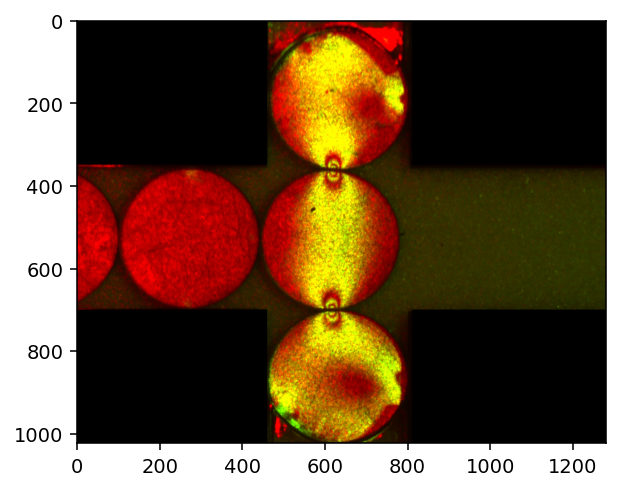

In [2]:
# Make some fake data with several potential wall contacts
fig, ax = plt.subplots()

image = checkImageType('test_data/Mid_Saturation.bmp')

# Create a cross-shaped channel
maskArr = crossMask(image.shape, xlim=np.array([460, 810]), ylim=np.array([350, 700]))

# Now we'll add some extra boundary regions, and merge them with the cross mask
#listOfMasks = np.array([maskArr,
#                       rectMask(imageShape, corner=np.array([300,0]), dimensions=np.array([500, 75]))])
#maskArr = mergeMasks(listOfMasks, signs=np.array([1,-1], dtype=np.int16))

ax.imshow(image * maskArr)
#for i in range(len(centers)):
#    c = plt.Circle(centers[i][::-1], radii[i], label='Detected particles', color='orange')
#    ax.add_artist(c)
#ax.legend()
plt.show()

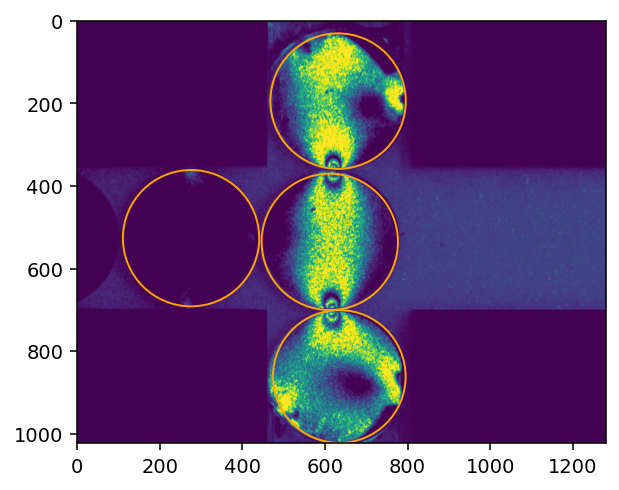

In [3]:
# Track particles

fig, ax = plt.subplots()

centers, radii = g2HoughCircle(image[:,:,0], [160, 180], accumulatorThreshold=30, cannyEdgeThreshold=80)

ax.imshow((image * maskArr)[:,:,1])
for i in range(len(centers)):
    c = plt.Circle(centers[i][::-1], radii[i], fill=None, label='Detected particles', color='orange')
    ax.add_artist(c)
#ax.legend()
plt.show()

/home/jack/miniconda3/envs/py37/lib/python3.7/site-packages/numba/core/ir_utils.py:2139: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'listOfMasks' of function 'mergeMasks'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../pepe/preprocess/Mask.py", line 226:
@numba.jit(nopython=True)
def mergeMasks(listOfMasks, signs=None, channels=3):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


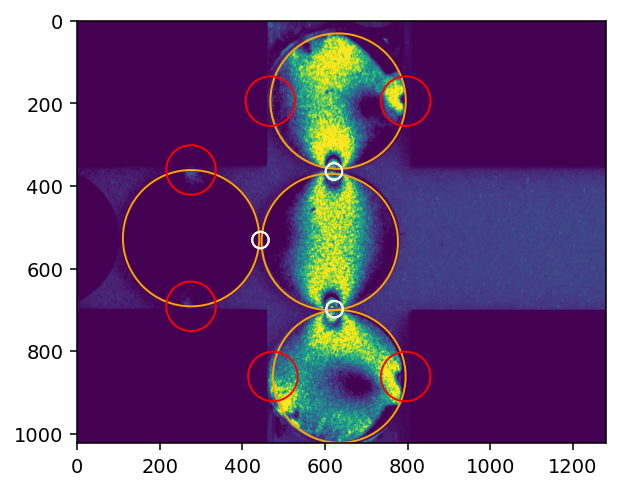

In [4]:
# Actual contact detection
numContacts, betaArr, g2AvgArr = detectWallContacts(centers, radii, maskArr, image[:,:,1],
                                                    contactPadding=20)

# Draw on all of the found boundary contacts
fig, ax = plt.subplots()

ax.imshow((image * maskArr)[:,:,1])

for i in range(len(centers)):
    # particle itself
    c = plt.Circle(centers[i][::-1], radii[i], color='orange', fill=None)
    ax.add_artist(c)
    
    # Now add contacts
    for j in range(numContacts[i]):
        contactPoint = centers[i] + radii[i] * np.array([np.cos(betaArr[i][j]), np.sin(betaArr[i][j])])
        cc = plt.Circle(contactPoint[::-1], 60, color='red', fill=None)
        ax.add_artist(cc)
        
# Now draw interparticle contacts
adjMat = adjacencyMatrix(centers, radii, padding=20)
for k in range(len(centers)):
    for j in range(len(centers)):
        if adjMat[k,j] and k != j:
            cc = plt.Circle(((centers[j] + centers[k])/2)[::-1], 20, color='white', fill=None)
            ax.add_artist(cc)


#ax.legend()
plt.show()

In [6]:
g2AvgArr

[array([9.66512702, 2.67194245]),
 array([], dtype=float64),
 array([22.03878702, 65.98092869]),
 array([92.11151663, 80.33096828])]